## kNN
We have subjected the signals from https://www.sciencedirect.com/science/article/pii/S2352340918314124 to certain transformations to preprocess them: 
* In order to have more training data, each signal capture (of duration 10 seconds), we have divided it into 10 signals of 1s each (numerous studies show that with less than 1s of vibration, faults in the signals can be appreciated).
* Each signal captured every 1s was multiplied by a Hamming-type window function.
* After applying the window function, the signals were subjected to a low pass band filter.

For each preprocessed signal we calculated 8 statistics and/or significant parameters for diagnosis: Kurtosis, Impulse factor, RMS, Margin factor, Skewness, Shape factor, Peak to peak, Crest factor. 

We are going to apply the kNN technique to predict on a test set the type of input signal. We will find the optimal value of k by looking at the accuracy of train and test as k varies.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.externals
import joblib 

In [2]:
df_train = pd.read_csv("statistics_10_train.csv" , sep = ',')
df_test = pd.read_csv("statistics_10_test.csv" , sep = ',')

In [3]:
X_train = df_train[['Kurtosis', 'Impulse factor', 'RMS', 'Margin factor', 'Skewness',
               'Shape factor', 'Peak to peak', 'Crest factor']].values
y_train = df_train['Tipo'].values
X_test = df_test[['Kurtosis', 'Impulse factor', 'RMS', 'Margin factor', 'Skewness',
               'Shape factor', 'Peak to peak', 'Crest factor']].values
y_test = df_test['Tipo'].values

In [4]:
scaler = MinMaxScaler()
# Escalamos los predictores:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

----- k: 1----- Accuracy test: 0.9777777777777777-----
----- k: 2----- Accuracy test: 0.9666666666666667-----
----- k: 3----- Accuracy test: 0.9777777777777777-----
----- k: 4----- Accuracy test: 0.9777777777777777-----
----- k: 5----- Accuracy test: 0.9777777777777777-----
----- k: 6----- Accuracy test: 0.9777777777777777-----
----- k: 7----- Accuracy test: 0.9777777777777777-----
----- k: 8----- Accuracy test: 0.9777777777777777-----
----- k: 9----- Accuracy test: 0.9666666666666667-----
----- k: 10----- Accuracy test: 0.9666666666666667-----
----- k: 11----- Accuracy test: 0.9444444444444444-----
----- k: 12----- Accuracy test: 0.9444444444444444-----
----- k: 13----- Accuracy test: 0.9444444444444444-----
----- k: 14----- Accuracy test: 0.9555555555555556-----
----- k: 15----- Accuracy test: 0.9444444444444444-----
----- k: 16----- Accuracy test: 0.9555555555555556-----
----- k: 17----- Accuracy test: 0.9555555555555556-----
----- k: 18----- Accuracy test: 0.9555555555555556-----
-

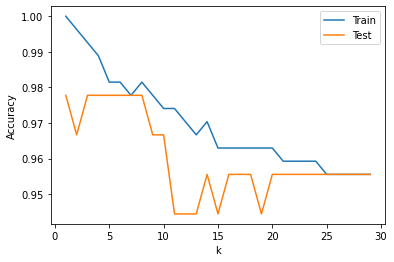

In [5]:
k_values = range(1, 30)
scores_train = []
scores_test = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores_train.append(knn.score(X_train, y_train))
    scores_test.append(knn.score(X_test, y_test))
    print('----- k: ' + str(k) + '----- Accuracy test: ' + str(scores_test[k - 1]) + '-----')
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(k_values, scores_train, label = 'Train')
plt.plot(k_values, scores_test, label = 'Test')
plt.legend()

In [6]:
n_neighbors = 5
classifier = KNeighborsClassifier(n_neighbors)
classifier.fit(X_train, y_train)
print('Accuracy en el conjunto de train: {:.3f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy en el conjunto de test: {:.3f}'
     .format(classifier.score(X_test, y_test)))

Accuracy en el conjunto de train: 0.981
Accuracy en el conjunto de test: 0.978


In [7]:
target_names = ['Inner', 'Outer', 'Healthy']
pred = classifier.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, target_names = target_names))

[[29  1  0]
 [ 0 30  0]
 [ 0  1 29]]
              precision    recall  f1-score   support

       Inner       1.00      0.97      0.98        30
       Outer       0.94      1.00      0.97        30
     Healthy       1.00      0.97      0.98        30

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



In [8]:
pred_train = classifier.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train, target_names = target_names))

[[90  0  0]
 [ 0 86  4]
 [ 0  1 89]]
              precision    recall  f1-score   support

       Inner       1.00      1.00      1.00        90
       Outer       0.99      0.96      0.97        90
     Healthy       0.96      0.99      0.97        90

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270



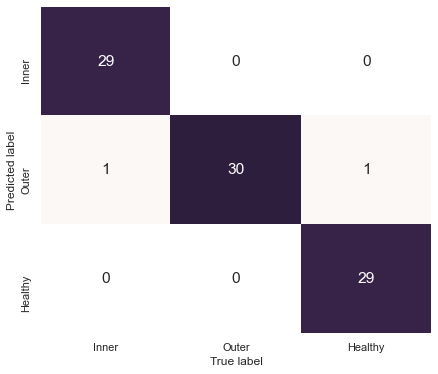

In [9]:
sns.set()
mat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(7,6))
sns.set(font_scale=1.3)
sns.heatmap(mat.T, square=False, annot=True, fmt='d', cbar=False,
            xticklabels=['Inner', 'Outer', 'Healthy'],
            yticklabels=['Inner', 'Outer', 'Healthy'],
            cmap=sns.cubehelix_palette(light=1, as_cmap=True))

plt.xlabel('True label');
plt.ylabel('Predicted label');

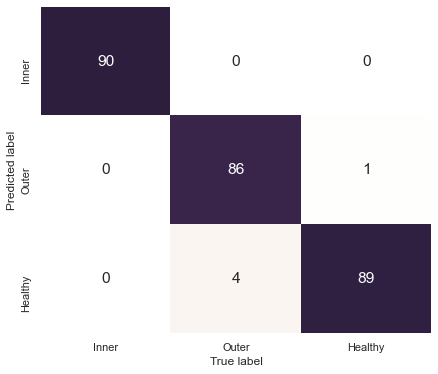

In [10]:
sns.set()
mat = confusion_matrix(y_train, classifier.predict(X_train))
fig, ax = plt.subplots(figsize=(7,6))
sns.set(font_scale=1.3)
sns.heatmap(mat.T, square=False, annot=True, fmt='d', cbar=False,
            xticklabels=['Inner', 'Outer', 'Healthy'],
            yticklabels=['Inner', 'Outer', 'Healthy'],
            cmap=sns.cubehelix_palette(light=1, as_cmap=True))

plt.xlabel('True label');
plt.ylabel('Predicted label');

In [11]:
joblib.dump(classifier, 'knn_traintest_trained.pkl') 

['knn_traintest_trained.pkl']

In [12]:
scaler_filename = "scaler_traintest.pkl"
joblib.dump(scaler, scaler_filename) 

['scaler_traintest.pkl']